# Understanding Basic Statistics

## Chapter 2: Organizing Data


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

CHPT_2 = '/home/mark/Documents/Class/Understanding Basic Statistics/Data/Chapter 2'

### Code

In [2]:
def str_to_arr(s):
    '''
    converts a str of space separeted values to an array
    '''
    res = map(int, s.split())
    res = np.array(list(res))
    return res

In [3]:
def class_width(min_val, max_val, num_classes):
    '''
    returns class width, p. 45
    '''
    return int(((max_val - min_val) / num_classes) + 1)

In [4]:
def class_limits(min_val, classes, cls_width):
    '''
    returns class limits (p. 45) as a list of tuples
    '''
    lower_limits = np.array([min_val + n * cls_width for n in range(classes)])
    upper_limits = lower_limits + cls_width - 1
    
    res = [(a, b) for a, b in (zip(lower_limits, upper_limits))]
    
    return res

In [5]:
def freq_dist(data, classes, titles=('','')):
    '''
    produces histogram and relative frequency graphs

    '''
    if isinstance(titles, str):
        titles = (titles, titles)
    
    print(f'min: {data.min()}  max: {data.max()}  size: {data.size}')

    cls_width = class_width(data.min(), data.max(), classes)
    print(f'class width: {cls_width}')

    freq, edges = np.histogram(data, range=(data.min(), data.min() + cls_width*classes), bins=classes)
    print(f'freq: {freq}')
#     print(f'edges: {edges}')

    cls_limits = class_limits(data.min(), classes, cls_width)
    print(f'cls_limits: {cls_limits}')

    bounds = np.array([data.min() - 0.5 + n * cls_width for n in range(classes + 1)])
    print(f'boundaries: {bounds}')

    midpts = [sum(e) / 2 for e in cls_limits]
    print(f'midpts: {midpts}')

    rel_freq = freq / data.size
    print(f'rel_freq: {rel_freq}')
    
    fig, ax = plt.subplots(1, 2, figsize=(15, 4))

    ax[0].hist(bounds[:-1], bounds, weights=freq)
    ax[0].set_title(titles[0])
    ax[0].set_ylabel(r'Frequency, $f$')
    ax[0].grid(axis='x', color='0.85')
    ax[0].set_xticks(bounds)

    ax[1].hist(bounds[:-1], bounds, weights=rel_freq)
    ax[1].set_title(titles[0])
    ax[1].set_ylabel(r'Relative frequency, $f/n$')
    ax[1].grid(axis='x', color='0.85')
    ax[1].set_xticks(bounds)

    plt.show()

In [6]:
def ogive(data, classes, title=''):
    '''
    '''
    cls_width = class_width(data.min(), data.max(), classes)
    print(f'class width: {cls_width}')

    freq, edges = np.histogram(data, range=(data.min(), data.min() + cls_width*classes), bins=classes)
    print(f'freq: {freq}')
    cumulative = np.cumsum(np.hstack(([0],freq)))
    print(f'cumulative: {cumulative}')

    bounds = np.array([data.min() - 0.5 + n * cls_width for n in range(classes + 1)])
    print(f'boundaries: {bounds}')

    fig, ax0 = plt.subplots(1, 1, figsize=(6, 4))

    ax0.plot(bounds, cumulative, 'ro-')
    ax0.set_title(title)
    ax0.set_ylabel(r'Cumulative frequency, $\Sigma f$')
    ax0.grid(axis='x', color='0.85')
    ax0.set_xticks(bounds)

    plt.show()

In [7]:
def dotplot(data, title=''):
    '''
    produces dot plot graph
    '''
    x = []
    y = []
    unique, counts = np.unique(data, return_counts=True)
    for v, n in zip(unique, counts):
        for i in range(1, n + 1):
            x.append(v)
            y.append(i)

    w = 2
    fig, ax0 = plt.subplots(1, 1, figsize=(15, w))

    ax0.scatter(x, y, c='k')
    ax0.set_title(title)
    ax0.grid(axis='x', color='0.85')
    ax0.set_ylim((0, 6 * w))

    plt.show()

In [8]:
def stem_leave(df, sort=True, fill=True, split=False, show_table=False):
    '''
    produces stem and leaf display
    '''
    table = {}
    for n in df:
        stem = n // 10
        leaf = n % 10
        leaves = table.get(stem, [])
        leaves.append(leaf)
        table[stem] = leaves

    if show_table:
        print(f'\ntable:\n{table}')

    print('Stem | Leaves')
    if sort:
        if fill:
            for stem in range(df.min() // 10, 
                              df.max() // 10 + 1):
                leaves = table.get(stem, [])
                if split:
                    for half in [filter(lambda n: n<5, leaves), filter(lambda n: n>=5, leaves)]:
                       print(f'{stem:4d} | {" ".join(map(str, sorted(half)))}')
                else:
                    print(f'{stem:4d} | {" ".join(map(str, sorted(leaves)))}')
        else:
            for stem, leaves in sorted(table.items()):
                print(f'{stem:4d} | {" ".join(map(str, sorted(leaves)))}')
    else:
        if fill:
            for stem in range(df.min() // 10, 
                              df.max() // 10 + 1):
                leaves = table.get(stem, [])
                print(f'{stem:4d} | {" ".join(map(str, leaves))}')
        else:
            for stem, leaves in sorted(table.items()):
                print(f'{stem:4d} | {" ".join(map(str, leaves))}')


In [9]:
def pareto_plot(df, data_col, label_col, title=''):
    '''
    plots a pareto chart
    
    df: dataframe
    data_col: str, data column name
    label_col: str, label column name
    title: str
    '''
    df = df.sort_values(by=[data_col], ascending=False)
    df = df.set_index(label_col)

    fig, ax0 = plt.subplots(1, 1, figsize=(8, 6))

    ax0.bar(df.index, df[data_col])
    ax0.set_title(title)
    ax0.grid(axis='y', color='0.95')
    ax0.set_xticks(df.index)
    ax0.set_xticklabels(labels=df.index, rotation=45)

    plt.show()

In [10]:
def pie_plot(df, data_col, label_col, title=''):
    '''
    plots a pie chart
    
    df: dataframe
    data_col: str, data column name
    label_col: str, label column name
    title: str
    '''
    df = df.sort_values(by=[data_col], ascending=False)
    df = df.set_index(label_col)

    fig, ax0 = plt.subplots(1, 1, figsize=(8, 6))

    ax0.pie(df[data_col], labels=df.index, autopct='%1.0f%%', 
            shadow=True, explode=[.1]*df.size, normalize=True)
    ax0.set_title(title)
    ax0.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

    plt.show()

### Chapter 2 Data

In [11]:
path = CHPT_2
files = os.listdir(CHPT_2)
files.sort()

for fn in files:
    print(fn)

Exer0204.xls
Prob0201_16.xls
Prob0201_17.xls
Prob0201_18.xls
Prob0201_19.xlsx
Prob0201_20.xls
Prob0201_21.xls
Prob0201_22.xls
Prob0202_08.xls
Prob0202_13.xls
Prob0202_14.xls
Prob0203_01.xls
Prob0203_02.xls
Prob0203_03.xls
Prob0203_05.xls
Prob0203_06.xls
Prob201_10.xlsx
Prob201_15.xlsx
RProb0208.xls
RProb0209.xls
RProb0210.xls
RProb0211.csv
RProb0211.xls
RProb0214.xls
RProb0215.xls
RProb0216.xls
RProb0217.xls
Table0201.xls
Table0202.xls
Table0203.xls
Table0204.xls
Table0211.xls
Table0212.xls
Table0214.xls
Table0215.xls
Table0216.xls
Table0217.xls
Table0218.xls


In [12]:
for fn in files:
    if fn.endswith('.xls') or fn.endswith('.xlsx'):
        df = pd.read_excel(os.path.join(CHPT_2, fn))
        print(f'\nfn: {fn}\nshape: {df.shape}')
        display(df.head())
    elif fn.endswith('.csv'):
        df = pd.read_csv(os.path.join(CHPT_2, fn))
        print(f'\nfn: {fn}\nshape: {df.shape}')
        display(df.head())
    else:
        print(f'\nfn: {fn}')



fn: Exer0204.xls
shape: (35, 1)


,scores
0,132
1,118
2,124
3,109
4,104



fn: Prob0201_16.xls
shape: (70, 1)


,glucose_(mg/100ml)
0,45
1,66
2,83
3,71
4,76



fn: Prob0201_17.xls
shape: (42, 1)


,time_(months)
0,19
1,18
2,17
3,1
4,21



fn: Prob0201_18.xls
shape: (73, 1)


,depth_(cm)
0,85
1,45
2,75
3,60
4,90



fn: Prob0201_19.xlsx
shape: (50, 1)


,Percentage male
0,31
1,39
2,53
3,47
4,40



fn: Prob0201_20.xls
shape: (55, 1)


,words
0,34
1,21
2,37
3,31
4,10



fn: Prob0201_21.xls
shape: (32, 1)


,wheat_(tonnes)
0,2.71
1,1.62
2,2.60
3,1.64
4,2.20



fn: Prob0201_22.xls
shape: (26, 1)


,average
0,0.194
1,0.258
2,0.190
3,0.291
4,0.158



fn: Prob0202_08.xls
shape: (5, 2)


,River,spearheads
0,Bann,19
1,Blackwater,8
2,Erne,15
3,Shannon,33
4,Barrow,14



fn: Prob0202_13.xls
shape: (15, 2)


,Year,Elevation
0,1986,3817
1,1987,3815
2,1988,3810
3,1989,3812
4,1990,3808



fn: Prob0202_14.xls
shape: (15, 2)


,Age,Height_(in)
0,0.5,26
1,1.0,29
2,2.0,33
3,3.0,36
4,4.0,39



fn: Prob0203_01.xls
shape: (32, 1)


,years
0,58
1,52
2,68
3,86
4,72



fn: Prob0203_02.xls
shape: (48, 1)


,loss_(percent)
0,46
1,37
2,36
3,42
4,81



fn: Prob0203_03.xls
shape: (51, 3)


,State,Hospitals,stay_(days)
0,Alabama,119,7.0
1,Alaska,16,5.7
2,Arizona,61,5.5
3,Arkansas,88,7.0
4,California,440,6.0



fn: Prob0203_05.xls
shape: (20, 2)


,1961-81,1981-2000
0,23,9
1,23,8
2,18,9
3,19,10
4,16,14



fn: Prob0203_06.xls
shape: (32, 2)


,1st_round,4th_round
0,71,69
1,65,69
2,67,73
3,73,74
4,74,72



fn: Prob201_10.xlsx
shape: (36, 1)


,Salaries_($k)
0,54
1,55
2,55
3,57
4,57



fn: Prob201_15.xlsx
shape: (57, 1)


,Finish times (to the nearest hour)
0,261
1,271
2,236
3,244
4,279



fn: RProb0208.xls
shape: (50, 1)


,age_(years)
0,46
1,16
2,41
3,26
4,22



fn: RProb0209.xls
shape: (60, 1)


,circum_(mm)
0,108
1,99
2,106
3,102
4,115



fn: RProb0210.xls
shape: (5, 2)


,Case,Filings_(k)
0,Contracts,107
1,Torts,191
2,Abs_Liability,49
3,Other_Liability,38
4,Other,21



fn: RProb0211.csv
shape: (15, 29)


,119,5,6,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28
0,120,0.0,0.0,1.0,2.0,3.0,3.0,3.0,3.0,3.0,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
1,120,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,121,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,121,5.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,122,0.0,0.0,1.0,1.0,1.0,1.0,2.0,2.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



fn: RProb0211.xls
shape: (15, 29)


,119,5,6,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28
0,120,0.0,0.0,1.0,2.0,3.0,3.0,3.0,3.0,3.0,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
1,120,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,121,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,121,5.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,122,0.0,0.0,1.0,1.0,1.0,1.0,2.0,2.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



fn: RProb0214.xls
shape: (50, 1)


,age_(years)
0,46
1,16
2,41
3,26
4,22



fn: RProb0215.xls
shape: (60, 1)


,circum_(mm)
0,108
1,99
2,106
3,102
4,115



fn: RProb0216.xls
shape: (5, 2)


,Case,Filings_(k)
0,Contracts,107
1,Torts,191
2,Abs_Liability,49
3,Other_Liability,38
4,Other,21



fn: RProb0217.xls
shape: (15, 29)


,119,5,6,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28
0,120,0.0,0.0,1.0,2.0,3.0,3.0,3.0,3.0,3.0,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
1,120,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,121,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,121,5.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,122,0.0,0.0,1.0,1.0,1.0,1.0,2.0,2.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



fn: Table0201.xls
shape: (60, 1)


,distance (miles)
0,13
1,47
2,10
3,3
4,16



fn: Table0202.xls
shape: (6, 4)


,Limits,Boundaries,Frequency,Midpoint
0,1,0.5,14,4.5
1,9,8.5,21,12.5
2,17,16.5,11,20.5
3,25,24.5,6,28.5
4,33,32.5,4,36.5



fn: Table0203.xls
shape: (6, 3)


,Class,Freq,Rel_Freq
0,1,14,0.23
1,9,21,0.35
2,17,11,0.18
3,25,6,0.10
4,33,4,0.07



fn: Table0204.xls
shape: (40, 1)


,Time_(min)
0,1
1,5
2,5
3,6
4,7



fn: Table0211.xls
shape: (5, 4)


,Class_Lower,Class_Upper,Freq,Cumulative
0,10.5,20.5,23,23
1,20.5,30.5,43,66
2,30.5,40.5,51,117
3,40.5,50.5,27,144
4,50.5,60.5,7,151



fn: Table0212.xls
shape: (7, 2)


,Cause,Frequency
0,Snoozing,15
1,car_trouble,5
2,breakfast,13
3,studying,20
4,dressing,8



fn: Table0214.xls
shape: (20, 1)


,distance_(miles)
0,1.5
1,1.4
2,1.7
3,1.6
4,1.9



fn: Table0215.xls
shape: (40, 1)


,weight_(lbs)
0,30
1,27
2,12
3,42
4,35



fn: Table0216.xls
shape: (25, 4)


,Brand,Tar,Nicotine,CO
0,Alpine,14.1,0.86,13.6
1,Benson_Hedges,16.0,1.06,16.6
2,Bull_Durham,29.8,2.03,23.5
3,Camel_Lights,8.0,0.67,10.2
4,Carlton,4.1,0.40,5.4



fn: Table0217.xls
shape: (32, 1)


,scores
0,95
1,70
2,79
3,99
4,83



fn: Table0218.xls
shape: (32, 1)


,scores
0,80
1,68
2,51
3,80
4,83


### Section 2.1 _Frequency Distributions, Histograms, and Related Topics_


In [13]:
table_2_1_str = '''
13 47 10 3 16 20 17 40 4 2 
7 25 8 21 19 15 3 17 14 6 
12 45 1 8 4 16 11 18 23 12 
6 2 14 13 7 15 46 12 9 18 
34 13 41 28 36 17 24 27 29 9 
14 26 10 24 37 31 8 16 12 16
'''

data = str_to_arr(table_2_1_str)

data

array([13, 47, 10,  3, 16, 20, 17, 40,  4,  2,  7, 25,  8, 21, 19, 15,  3,
       17, 14,  6, 12, 45,  1,  8,  4, 16, 11, 18, 23, 12,  6,  2, 14, 13,
        7, 15, 46, 12,  9, 18, 34, 13, 41, 28, 36, 17, 24, 27, 29,  9, 14,
       26, 10, 24, 37, 31,  8, 16, 12, 16])

#### np.histogram
https://numpy.org/doc/stable/reference/generated/numpy.histogram.html

In [14]:
classes = 6
width = class_width(data.min(), data.max(), classes)
print(f'width: {width}')

freq, edges = np.histogram(data, range=(data.min(), width*classes), bins=classes)
print(f'freq: {freq}')
print(f'edges: {edges}')

lower_limits = np.array([data.min() + n * width for n in range(classes)])
print(f'lower_limits: {lower_limits}')

upper_limits = lower_limits + width - 1
print(f'upper_limits: {upper_limits}')

# bounds = np.hstack((lower_limits - 0.5, upper_limits[-1] + 0.5))
bounds = np.array([data.min() - 0.5 + n * width for n in range(classes + 1)])
print(f'bounds: {bounds}')

midpts = (lower_limits + upper_limits) / 2
print(f'midpts: {midpts}')

rel_freq = freq / data.size
print(f'rel_freq: {rel_freq}')

width: 8
freq: [14 21 11  6  4  4]
edges: [ 1.          8.83333333 16.66666667 24.5        32.33333333 40.16666667
 48.        ]
lower_limits: [ 1  9 17 25 33 41]
upper_limits: [ 8 16 24 32 40 48]
bounds: [ 0.5  8.5 16.5 24.5 32.5 40.5 48.5]
midpts: [ 4.5 12.5 20.5 28.5 36.5 44.5]
rel_freq: [0.23333333 0.35       0.18333333 0.1        0.06666667 0.06666667]


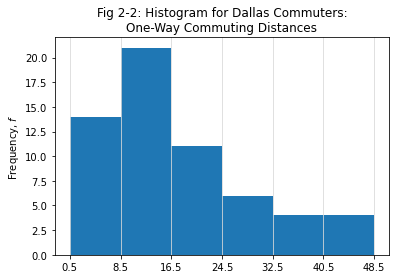

In [15]:
# Figure 2-2
plt.hist(bounds[:-1], bounds, weights=freq)
plt.title('Fig 2-2: Histogram for Dallas Commuters:\nOne-Way Commuting Distances')
plt.ylabel(r'Frequency, $f$')
plt.grid(axis='x', color='0.85')
plt.xticks(bounds)
plt.show()

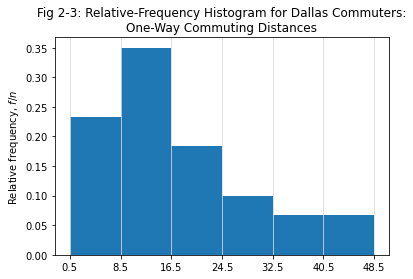

In [16]:
# Figure 2-3
plt.hist(bounds[:-1], bounds, weights=rel_freq)
plt.title('Fig 2-3: Relative-Frequency Histogram for Dallas Commuters:\nOne-Way Commuting Distances')
plt.ylabel(r'Relative frequency, $f/n$')
plt.grid(axis='x', color='0.85')
plt.xticks(bounds)
plt.show()

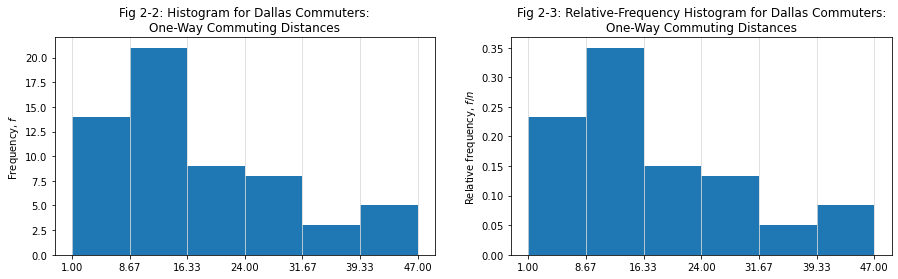

In [17]:
# Standard NumPy
freq, edges = np.histogram(data, bins=classes)
rel_freq = freq / data.size

fig, ax = plt.subplots(1, 2, figsize=(15, 4))

ax[0].hist(data, bins=classes)
ax[0].set_title('Fig 2-2: Histogram for Dallas Commuters:\nOne-Way Commuting Distances')
ax[0].set_ylabel(r'Frequency, $f$')
ax[0].grid(axis='x', color='0.85')
ax[0].set_xticks(edges)

ax[1].hist(edges[:-1], edges, weights=rel_freq)
ax[1].set_title('Fig 2-3: Relative-Frequency Histogram for Dallas Commuters:\nOne-Way Commuting Distances')
ax[1].set_ylabel(r'Relative frequency, $f/n$')
ax[1].grid(axis='x', color='0.85')
ax[1].set_xticks(edges)

plt.show()

data:
[ 1  5  5  6  7  4  8  7  6  5  5  6  7  6  6  5  8  9  9 10  7  8 11  2
  4  6  5 12 13  6  3  7  8  8  9  9 10  9  8  9]

min: 1  max: 13  size: 40
class width: 3
freq: [ 3 15 17  4  1]
cls_limits: [(1, 3), (4, 6), (7, 9), (10, 12), (13, 15)]
boundaries: [ 0.5  3.5  6.5  9.5 12.5 15.5]
midpts: [2.0, 5.0, 8.0, 11.0, 14.0]
rel_freq: [0.075 0.375 0.425 0.1   0.025]


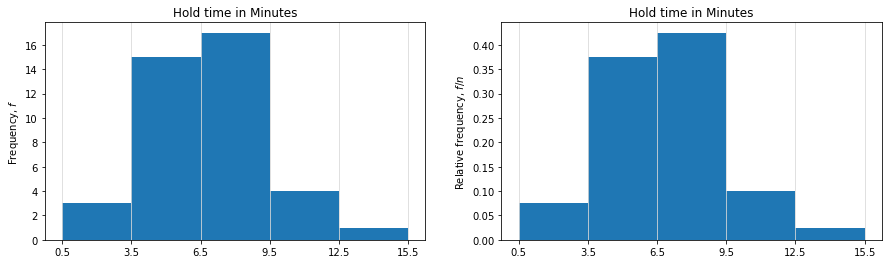

In [18]:
# Guided Exercise 1

data = str_to_arr('''
    1 5 5 6 7 4 8 7 6 5 
    5 6 7 6 6 5 8 9 9 10 
    7 8 11 2 4 6 5 12 13 6 
    3 7 8 8 9 9 10 9 8 9
''')

print(f'data:\n{data}\n')

classes = 5
freq_dist(data, classes, titles='Hold time in Minutes')

#### Section 2.1 Problems

In [19]:
# Sec 2.1 Problem 5
min_val = 20
max_val = 82
classes = 7
cls_width = class_width(min_val, max_val, classes)
print(f'cls_width: {cls_width}')

cls_limits = class_limits(min_val, classes, cls_width)
print(f'cls_limits: {cls_limits}')


cls_width: 9
cls_limits: [(20, 28), (29, 37), (38, 46), (47, 55), (56, 64), (65, 73), (74, 82)]


In [20]:
# Sec 2.1 Problem 6
min_val = 10
max_val = 120
classes = 5
cls_width = class_width(min_val, max_val, classes)
print(f'cls_width: {cls_width}')

cls_limits = class_limits(min_val, classes, cls_width)
print(f'cls_limits: {cls_limits}')


cls_width: 23
cls_limits: [(10, 32), (33, 55), (56, 78), (79, 101), (102, 124)]


data:
[ 54  55  55  57  57  59  60  65  65  65  66  68  68  69  69  70  70  70
  75  75  75  75  77  82  82  82  88  89  89  91  91  97  98  98  98 280]

min: 54  max: 280  size: 36
class width: 38
freq: [31  4  0  0  0  1]
cls_limits: [(54, 91), (92, 129), (130, 167), (168, 205), (206, 243), (244, 281)]
boundaries: [ 53.5  91.5 129.5 167.5 205.5 243.5 281.5]
midpts: [72.5, 110.5, 148.5, 186.5, 224.5, 262.5]
rel_freq: [0.86111111 0.11111111 0.         0.         0.         0.02777778]


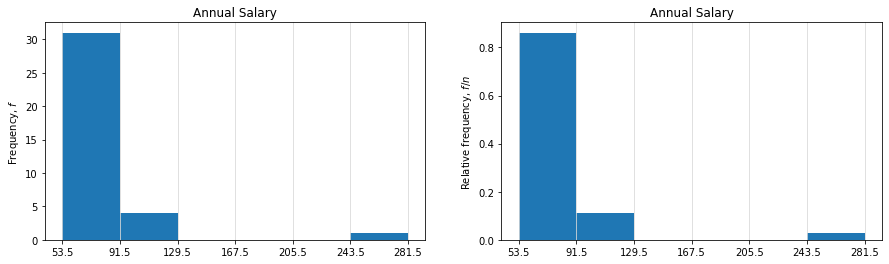

In [21]:
# Sec 2.1 Problem 10
data = str_to_arr('''
        54 55 55 57 57 59 60 65 65 65 66 68 68 
        69 69 70 70 70 75 75 75 75 77 82 82 82 
        88 89 89 91 91 97 98 98 98 280
    ''')

print(f'data:\n{data}\n')

classes = 6
freq_dist(data, classes, titles='Annual Salary')

data:
[54 55 55 57 57 59 60 65 65 65 66 68 68 69 69 70 70 70 75 75 75 75 77 82
 82 82 88 89 89 91 91 97 98 98 98]

min: 54  max: 98  size: 35
class width: 9
freq: [ 7 11  5  6  6]
cls_limits: [(54, 62), (63, 71), (72, 80), (81, 89), (90, 98)]
boundaries: [53.5 62.5 71.5 80.5 89.5 98.5]
midpts: [58.0, 67.0, 76.0, 85.0, 94.0]
rel_freq: [0.2        0.31428571 0.14285714 0.17142857 0.17142857]


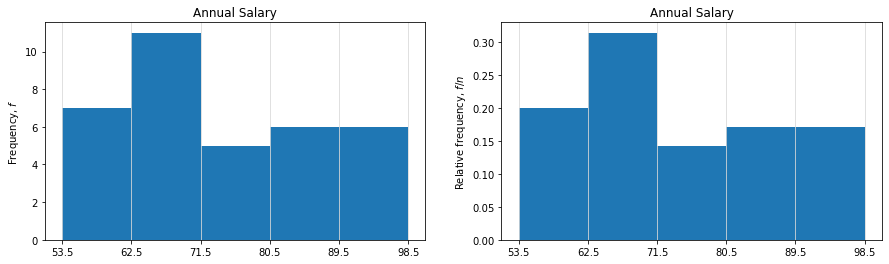

In [22]:
# Sec 2.1 Problem 10, part 2
data = str_to_arr('''
        54 55 55 57 57 59 60 65 65 65 66 68 68 
        69 69 70 70 70 75 75 75 75 77 82 82 82 
        88 89 89 91 91 97 98 98 98 
    ''')

print(f'data:\n{data}\n')

classes = 5
freq_dist(data, classes, titles='Annual Salary')

   Finish times (to the nearest hour)
0                                 261
1                                 271
2                                 236
3                                 244
4                                 279 

min: 236  max: 360  size: 57
class width: 25
freq: [ 4  9 25 16  3]
cls_limits: [(236, 260), (261, 285), (286, 310), (311, 335), (336, 360)]
boundaries: [235.5 260.5 285.5 310.5 335.5 360.5]
midpts: [248.0, 273.0, 298.0, 323.0, 348.0]
rel_freq: [0.07017544 0.15789474 0.43859649 0.28070175 0.05263158]


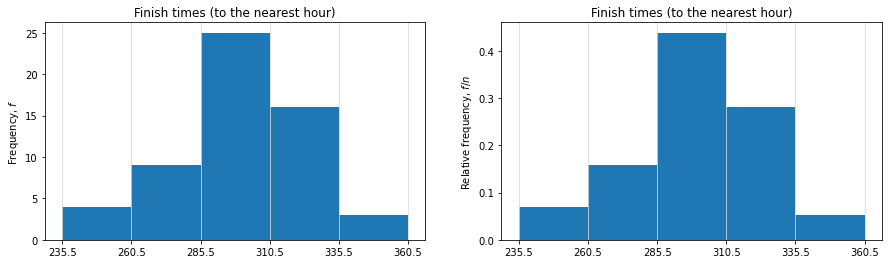

class width: 25
freq: [ 4  9 25 16  3]
cumulative: [ 0  4 13 38 54 57]
boundaries: [235.5 260.5 285.5 310.5 335.5 360.5]


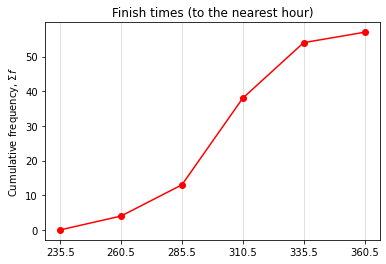

In [23]:
# Sec 2.1 Problem 15
path = '/home/mark/Documents/Class/Understanding Basic Statistics/Data/Chapter 2'
fn = 'Prob201_15.xlsx'
df = pd.read_excel(os.path.join(path, fn))
cols = df.columns.values.tolist()
print(df.head(), '\n')

data = df.iloc[:,0]
# print(f'data:\n{data}')

classes = 5
title = cols[0]
freq_dist(data, classes, title)
ogive(data, classes, title)


   glucose_(mg/100ml)
0                  45
1                  66
2                  83
3                  71
4                  76 

min: 45  max: 109  size: 70
class width: 11
freq: [ 3  7 22 26  9  3]
cls_limits: [(45, 55), (56, 66), (67, 77), (78, 88), (89, 99), (100, 110)]
boundaries: [ 44.5  55.5  66.5  77.5  88.5  99.5 110.5]
midpts: [50.0, 61.0, 72.0, 83.0, 94.0, 105.0]
rel_freq: [0.04285714 0.1        0.31428571 0.37142857 0.12857143 0.04285714]


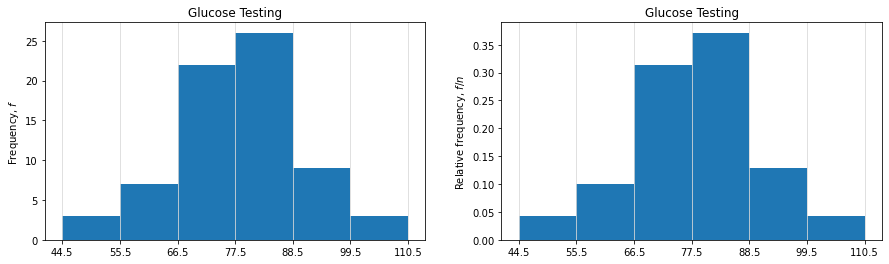

class width: 11
freq: [ 3  7 22 26  9  3]
cumulative: [ 0  3 10 32 58 67 70]
boundaries: [ 44.5  55.5  66.5  77.5  88.5  99.5 110.5]


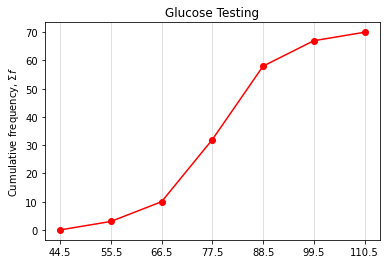

In [24]:
# Sec 2.1 Problem 16
path = '/home/mark/Documents/Class/Understanding Basic Statistics/Data/Chapter 2'
fn = 'Prob0201_16.xls'
df = pd.read_excel(os.path.join(path, fn))
cols = df.columns.values.tolist()
print(df.head(), '\n')

data = df.iloc[:,0]
# print(f'data:\n{data}')

classes = 6
title = 'Glucose Testing'
freq_dist(data, classes, title)
ogive(data, classes, title)


   time_(months)
0             19
1             18
2             17
3              1
4             21 

min: 1  max: 59  size: 42
class width: 12
freq: [ 6 10  5 13  8]
cls_limits: [(1, 12), (13, 24), (25, 36), (37, 48), (49, 60)]
boundaries: [ 0.5 12.5 24.5 36.5 48.5 60.5]
midpts: [6.5, 18.5, 30.5, 42.5, 54.5]
rel_freq: [0.14285714 0.23809524 0.11904762 0.30952381 0.19047619]


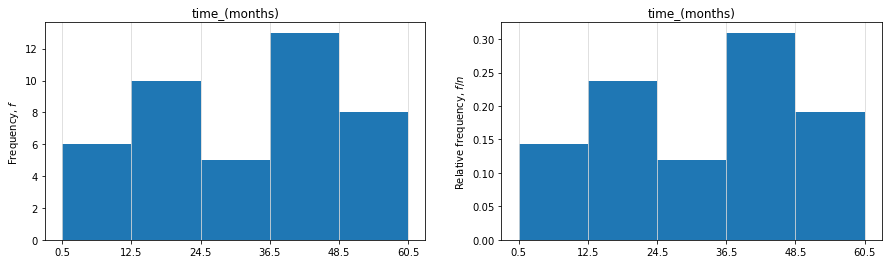

class width: 12
freq: [ 6 10  5 13  8]
cumulative: [ 0  6 16 21 34 42]
boundaries: [ 0.5 12.5 24.5 36.5 48.5 60.5]


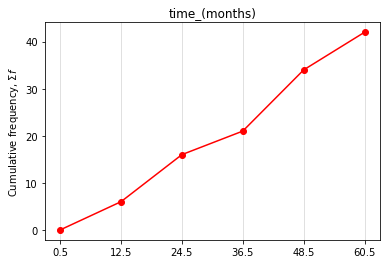

In [25]:
# Sec 2.1 Problem 17
path = '/home/mark/Documents/Class/Understanding Basic Statistics/Data/Chapter 2'
fn = 'Prob0201_17.xls'
df = pd.read_excel(os.path.join(path, fn))
cols = df.columns.values.tolist()
print(df.head(), '\n')

data = df.iloc[:,0]
# print(f'data:\n{data}')

classes = 5
title = cols[0]
freq_dist(data, classes, title)
ogive(data, classes, title)


   depth_(cm)
0          85
1          45
2          75
3          60
4          90 

min: 10  max: 200  size: 73
class width: 28
freq: [ 7 25 26  9  5  0  1]
cls_limits: [(10, 37), (38, 65), (66, 93), (94, 121), (122, 149), (150, 177), (178, 205)]
boundaries: [  9.5  37.5  65.5  93.5 121.5 149.5 177.5 205.5]
midpts: [23.5, 51.5, 79.5, 107.5, 135.5, 163.5, 191.5]
rel_freq: [0.09589041 0.34246575 0.35616438 0.12328767 0.06849315 0.
 0.01369863]


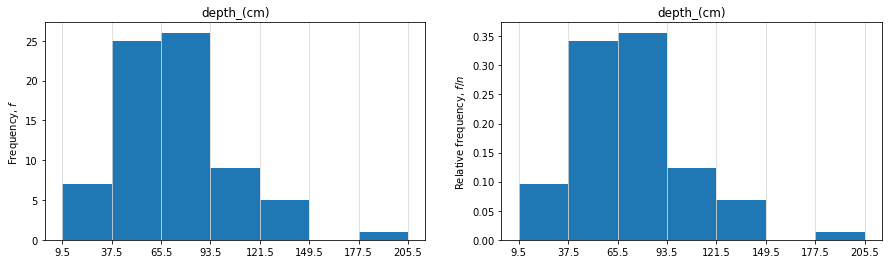

class width: 28
freq: [ 7 25 26  9  5  0  1]
cumulative: [ 0  7 32 58 67 72 72 73]
boundaries: [  9.5  37.5  65.5  93.5 121.5 149.5 177.5 205.5]


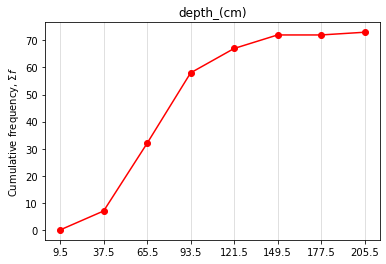

In [26]:
# Sec 2.1 Problem 18
path = '/home/mark/Documents/Class/Understanding Basic Statistics/Data/Chapter 2'
fn = 'Prob0201_18.xls'
df = pd.read_excel(os.path.join(path, fn))
cols = df.columns.values.tolist()
print(df.head(), '\n')

data = df.iloc[:,0]
# print(f'data:\n{data}')

classes = 7
title = cols[0]
freq_dist(data, classes, title)
ogive(data, classes, title)


   depth_(cm)
0          85
1          45
2          75
3          60
4          90 

min: 10  max: 145  size: 72
class width: 20
freq: [ 4 10 20 20 10  5  3]
cls_limits: [(10, 29), (30, 49), (50, 69), (70, 89), (90, 109), (110, 129), (130, 149)]
boundaries: [  9.5  29.5  49.5  69.5  89.5 109.5 129.5 149.5]
midpts: [19.5, 39.5, 59.5, 79.5, 99.5, 119.5, 139.5]
rel_freq: [0.05555556 0.13888889 0.27777778 0.27777778 0.13888889 0.06944444
 0.04166667]


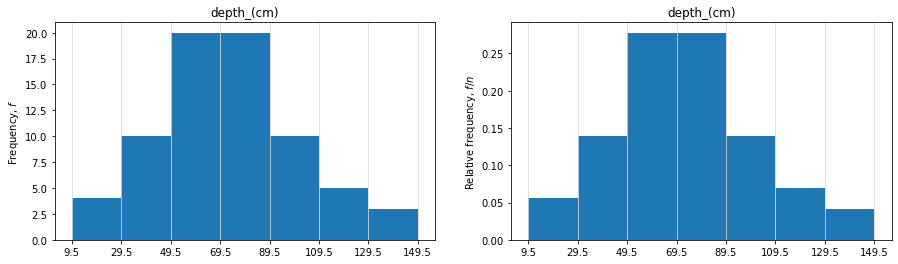

class width: 20
freq: [ 4 10 20 20 10  5  3]
cumulative: [ 0  4 14 34 54 64 69 72]
boundaries: [  9.5  29.5  49.5  69.5  89.5 109.5 129.5 149.5]


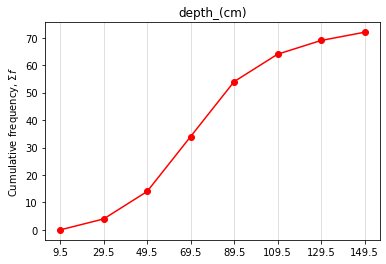

In [27]:
# Sec 2.1 Problem 18, part 2
path = '/home/mark/Documents/Class/Understanding Basic Statistics/Data/Chapter 2'
fn = 'Prob0201_18.xls'
df = pd.read_excel(os.path.join(path, fn))
cols = df.columns.values.tolist()
print(df.head(), '\n')

data = df.iloc[:,0].loc[(df<200).any(1)]
# print(f'data:\n{data}')

classes = 7
title = cols[0]
freq_dist(data, classes, title)
ogive(data, classes, title)


   Percentage male
0               31
1               39
2               53
3               47
4               40 

min: 26  max: 79  size: 50
class width: 4
freq: [ 1  1  3  5 12 11  9  4  1  1  0  1  0  1  0]
cls_limits: [(26, 29), (30, 33), (34, 37), (38, 41), (42, 45), (46, 49), (50, 53), (54, 57), (58, 61), (62, 65), (66, 69), (70, 73), (74, 77), (78, 81), (82, 85)]
boundaries: [25.5 29.5 33.5 37.5 41.5 45.5 49.5 53.5 57.5 61.5 65.5 69.5 73.5 77.5
 81.5 85.5]
midpts: [27.5, 31.5, 35.5, 39.5, 43.5, 47.5, 51.5, 55.5, 59.5, 63.5, 67.5, 71.5, 75.5, 79.5, 83.5]
rel_freq: [0.02 0.02 0.06 0.1  0.24 0.22 0.18 0.08 0.02 0.02 0.   0.02 0.   0.02
 0.  ]


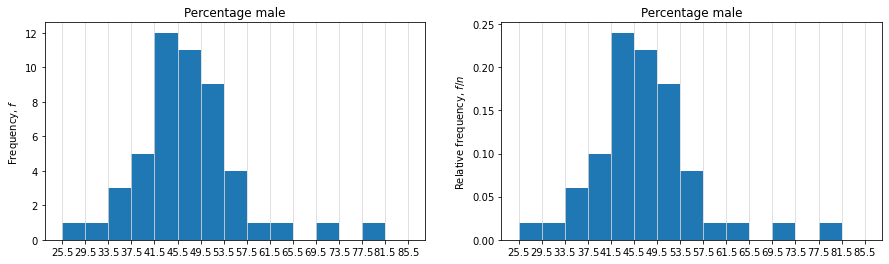

class width: 4
freq: [ 1  1  3  5 12 11  9  4  1  1  0  1  0  1  0]
cumulative: [ 0  1  2  5 10 22 33 42 46 47 48 48 49 49 50 50]
boundaries: [25.5 29.5 33.5 37.5 41.5 45.5 49.5 53.5 57.5 61.5 65.5 69.5 73.5 77.5
 81.5 85.5]


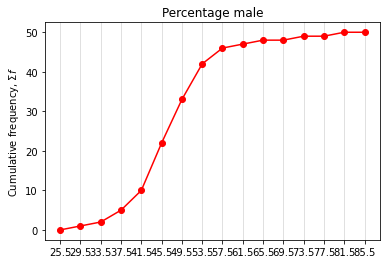

In [28]:
# Sec 2.1 Problem 19
path = '/home/mark/Documents/Class/Understanding Basic Statistics/Data/Chapter 2'
fn = 'Prob0201_19.xlsx'
df = pd.read_excel(os.path.join(path, fn))
cols = df.columns.values.tolist()
print(df.head(), '\n')

data = df.iloc[:,0]
# print(f'data:\n{data}')

classes = 15
title = cols[0]
freq_dist(data, classes, title)
ogive(data, classes, title)


   words
0     34
1     21
2     37
3     31
4     10 

min: 0  max: 43  size: 55
class width: 6
freq: [13 15 11  3  6  4  2  1]
cls_limits: [(0, 5), (6, 11), (12, 17), (18, 23), (24, 29), (30, 35), (36, 41), (42, 47)]
boundaries: [-0.5  5.5 11.5 17.5 23.5 29.5 35.5 41.5 47.5]
midpts: [2.5, 8.5, 14.5, 20.5, 26.5, 32.5, 38.5, 44.5]
rel_freq: [0.23636364 0.27272727 0.2        0.05454545 0.10909091 0.07272727
 0.03636364 0.01818182]


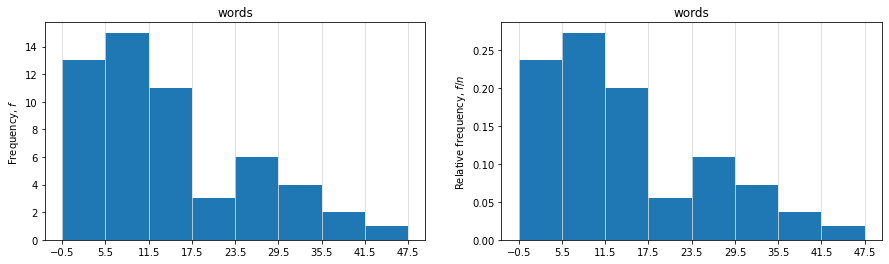

class width: 6
freq: [13 15 11  3  6  4  2  1]
cumulative: [ 0 13 28 39 42 48 52 54 55]
boundaries: [-0.5  5.5 11.5 17.5 23.5 29.5 35.5 41.5 47.5]


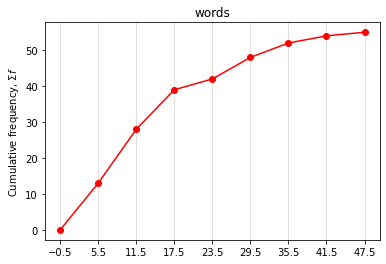

In [29]:
# Sec 2.1 Problem 20
path = '/home/mark/Documents/Class/Understanding Basic Statistics/Data/Chapter 2'
fn = 'Prob0201_20.xls'
df = pd.read_excel(os.path.join(path, fn))
cols = df.columns.values.tolist()
print(df.head(), '\n')

data = df.iloc[:,0]
# print(f'data:\n{data}')

classes = 8
title = cols[0]
freq_dist(data, classes, title)
ogive(data, classes, title)


   wheat_(tonnes)
0            2.71
1            1.62
2            2.60
3            1.64
4            2.20 

data:
0    271.0
1    162.0
2    260.0
3    164.0
4    220.0
Name: wheat_(tonnes), dtype: float64

min: 46.0  max: 282.0  size: 32
class width: 40
freq: [ 4  5 10  5  5  3]
cls_limits: [(46.0, 85.0), (86.0, 125.0), (126.0, 165.0), (166.0, 205.0), (206.0, 245.0), (246.0, 285.0)]
boundaries: [ 45.5  85.5 125.5 165.5 205.5 245.5 285.5]
midpts: [65.5, 105.5, 145.5, 185.5, 225.5, 265.5]
rel_freq: [0.125   0.15625 0.3125  0.15625 0.15625 0.09375]


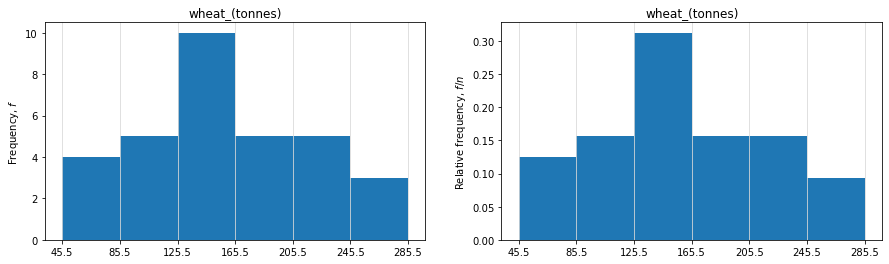

class width: 40
freq: [ 4  5 10  5  5  3]
cumulative: [ 0  4  9 19 24 29 32]
boundaries: [ 45.5  85.5 125.5 165.5 205.5 245.5 285.5]


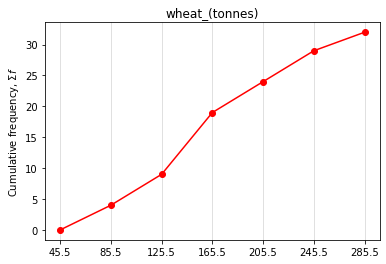

In [30]:
# Sec 2.1 Problem 21
path = '/home/mark/Documents/Class/Understanding Basic Statistics/Data/Chapter 2'
fn = 'Prob0201_21.xls'
df = pd.read_excel(os.path.join(path, fn))
cols = df.columns.values.tolist()
print(df.head(), '\n')

data = df.iloc[:,0] * 100
print(f'data:\n{data.head()}\n')

classes = 6
title = cols[0]
freq_dist(data, classes, title)
ogive(data, classes, title)


   average
0    0.194
1    0.258
2    0.190
3    0.291
4    0.158 

data:
0    194.0
1    258.0
2    190.0
3    291.0
4    158.0
Name: average, dtype: float64

min: 107.0  max: 317.0  size: 26
class width: 43
freq: [ 3  4  3 10  6]
cls_limits: [(107.0, 149.0), (150.0, 192.0), (193.0, 235.0), (236.0, 278.0), (279.0, 321.0)]
boundaries: [106.5 149.5 192.5 235.5 278.5 321.5]
midpts: [128.0, 171.0, 214.0, 257.0, 300.0]
rel_freq: [0.11538462 0.15384615 0.11538462 0.38461538 0.23076923]


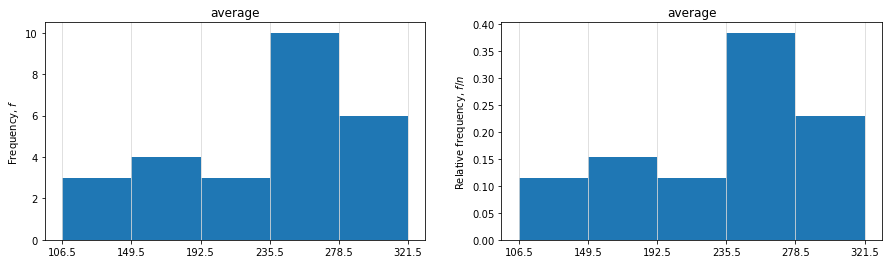

class width: 43
freq: [ 3  4  3 10  6]
cumulative: [ 0  3  7 10 20 26]
boundaries: [106.5 149.5 192.5 235.5 278.5 321.5]


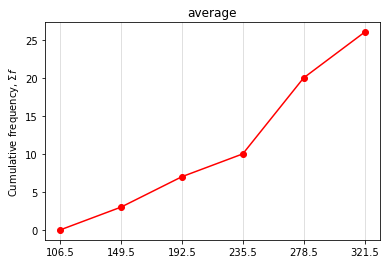

In [31]:
# Sec 2.1 Problem 22
path = '/home/mark/Documents/Class/Understanding Basic Statistics/Data/Chapter 2'
fn = 'Prob0201_22.xls'
df = pd.read_excel(os.path.join(path, fn))
cols = df.columns.values.tolist()
print(df.head(), '\n')

data = df.iloc[:,0] * 1000
print(f'data:\n{data.head()}\n')

classes = 5
title = cols[0]
freq_dist(data, classes, title)
ogive(data, classes, title)


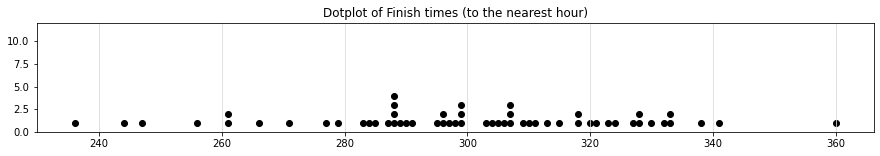

min: 236  max: 360  size: 57
class width: 25
freq: [ 4  9 25 16  3]
cls_limits: [(236, 260), (261, 285), (286, 310), (311, 335), (336, 360)]
boundaries: [235.5 260.5 285.5 310.5 335.5 360.5]
midpts: [248.0, 273.0, 298.0, 323.0, 348.0]
rel_freq: [0.07017544 0.15789474 0.43859649 0.28070175 0.05263158]


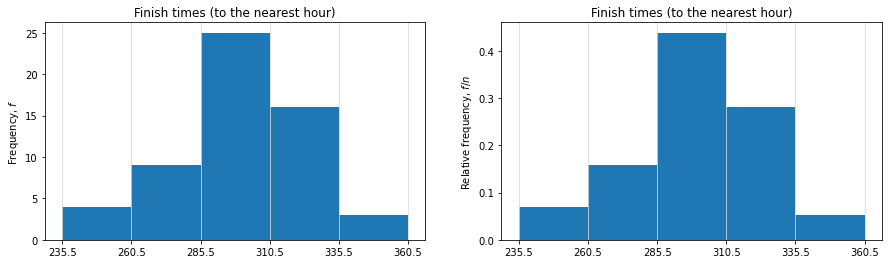

In [32]:
# Sec 2.1 Problem 24
path = '/home/mark/Documents/Class/Understanding Basic Statistics/Data/Chapter 2'
fn = 'Prob201_15.xlsx'
df = pd.read_excel(os.path.join(path, fn))
cols = df.columns.values.tolist()
# print(df.head(), '\n')

data = df.iloc[:,0]
# print(f'data:\n{data}')

classes = 5
title = cols[0]

dotplot(data, f'Dotplot of {cols[0]}')
freq_dist(data, classes, title)


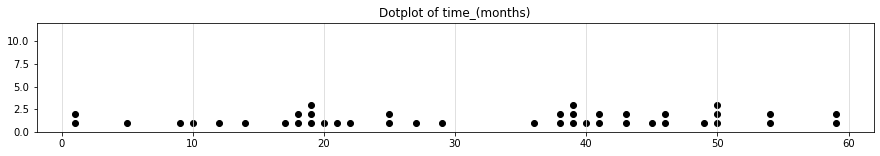

min: 1  max: 59  size: 42
class width: 12
freq: [ 6 10  5 13  8]
cls_limits: [(1, 12), (13, 24), (25, 36), (37, 48), (49, 60)]
boundaries: [ 0.5 12.5 24.5 36.5 48.5 60.5]
midpts: [6.5, 18.5, 30.5, 42.5, 54.5]
rel_freq: [0.14285714 0.23809524 0.11904762 0.30952381 0.19047619]


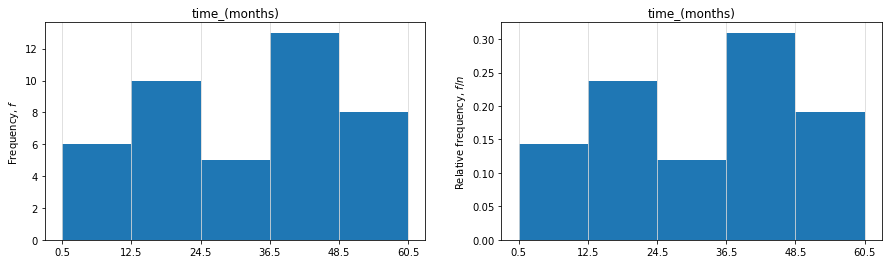

In [33]:
# Sec 2.1 Problem 25
path = '/home/mark/Documents/Class/Understanding Basic Statistics/Data/Chapter 2'
fn = 'Prob0201_17.xls'
df = pd.read_excel(os.path.join(path, fn))
cols = df.columns.values.tolist()
# print(df.head(), '\n')

data = df.iloc[:,0]
# print(f'data:\n{data}')

classes = 5
title = cols[0]

dotplot(data, f'Dotplot of {cols[0]}')
freq_dist(data, classes, title)


   Percentage male
0               31
1               39
2               53
3               47
4               40 



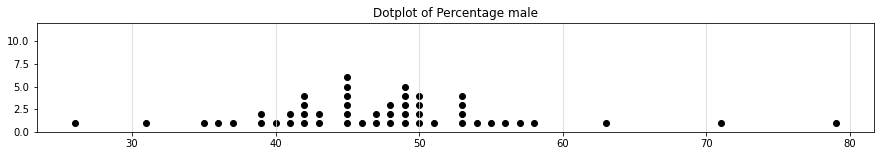

min: 26  max: 79  size: 50
class width: 11
freq: [ 4 21 22  1  2]
cls_limits: [(26, 36), (37, 47), (48, 58), (59, 69), (70, 80)]
boundaries: [25.5 36.5 47.5 58.5 69.5 80.5]
midpts: [31.0, 42.0, 53.0, 64.0, 75.0]
rel_freq: [0.08 0.42 0.44 0.02 0.04]


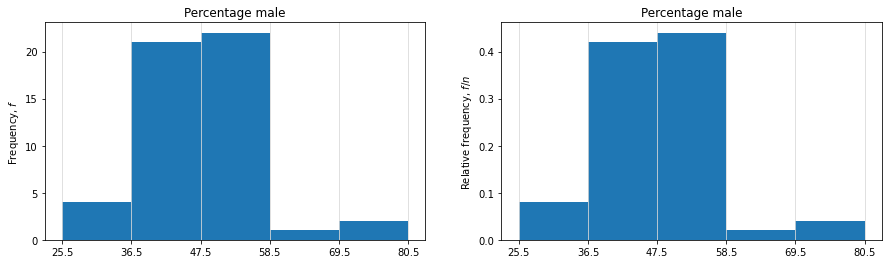

In [34]:
# Sec 2.1 Problem 19, Revisited
df = pd.read_excel(os.path.join(CHPT_2, 'Prob0201_19.xlsx'))
cols = df.columns.values.tolist()
print(df.head(), '\n')

data = df.iloc[:,0]
# print(f'data:\n{data}')

title = cols[0]

dotplot(data, f'Dotplot of {cols[0]}')
freq_dist(data, classes, title)


### Section 2.2 _Bar Graphs, Circle Graphs, and Time-Series Graphs_


#### Section 2.2 Problems

        River  spearheads
0        Bann          19
1  Blackwater           8
2        Erne          15
3     Shannon          33
4      Barrow          14 



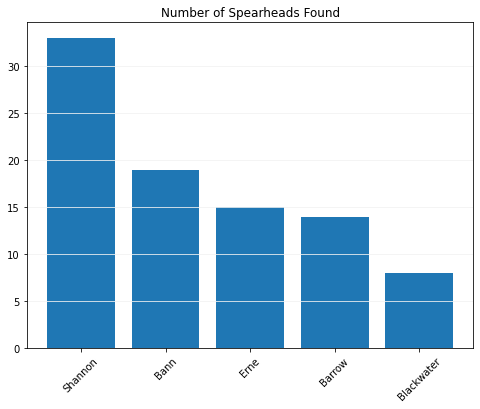

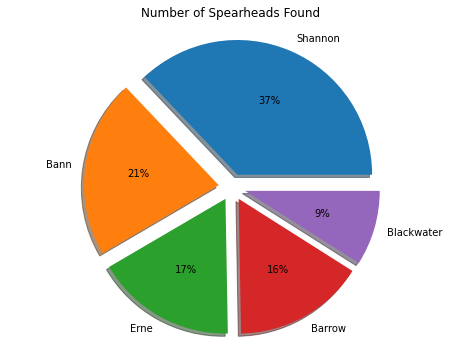

In [35]:
# Sec 2.2 Problem 8
df = pd.read_excel(os.path.join(CHPT_2, 'Prob0202_08.xls'))
print(df.head(), '\n')

# df = df.sort_values(by=['spearheads'], ascending=False)
# df = df.set_index('River')

title = 'Number of Spearheads Found'

pareto_plot(df, 'spearheads', 'River', title)

pie_plot(df, 'spearheads', 'River', title)

,Elevation
Year,
1986,3817
1987,3815
1988,3810
1989,3812
1990,3808
1991,3803
1992,3798
1993,3797
1994,3795


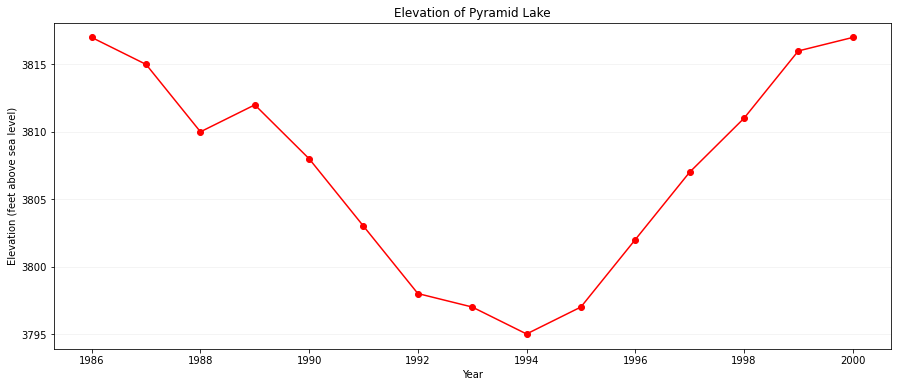

In [36]:
# Sec 2.2 Problem 13
path = '/home/mark/Documents/Class/Understanding Basic Statistics/Data/Chapter 2'
fn = 'Prob0202_13.xls'
df = pd.read_excel(os.path.join(path, fn))
cols = df.columns.values.tolist()
# print(df.head(), '\n')

df = df.set_index('Year')

display(df)

title = 'Elevation of Pyramid Lake'

fig, ax0 = plt.subplots(1, 1, figsize=(15, 6))

ax0.plot(df.index, df['Elevation'], 'ro-')
ax0.set_title(title)
ax0.grid(axis='y', color='0.95')
ax0.set_xlabel('Year')
ax0.set_ylabel('Elevation (feet above sea level)')

plt.show()

,Height_(in)
Age,
0.5,26
1.0,29
2.0,33
3.0,36
4.0,39
5.0,42
6.0,45
7.0,47
8.0,50


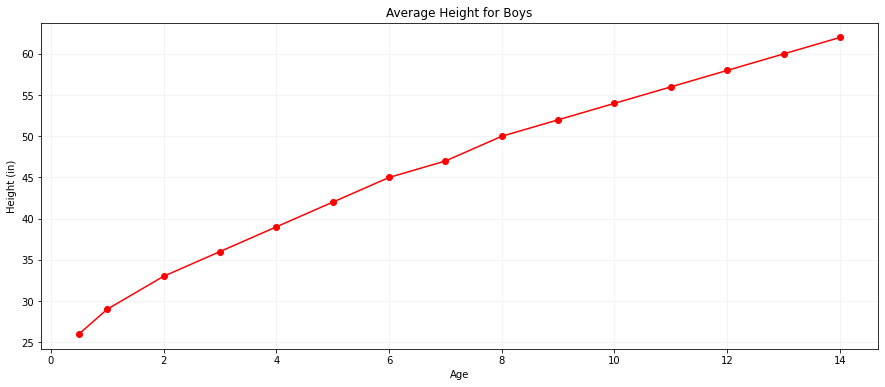

In [37]:
# Sec 2.2 Problem 14
path = '/home/mark/Documents/Class/Understanding Basic Statistics/Data/Chapter 2'
fn = 'Prob0202_14.xls'
df = pd.read_excel(os.path.join(path, fn))
# print(df.head(), '\n')

df = df.set_index('Age')

display(df)

title = 'Average Height for Boys'

fig, ax0 = plt.subplots(1, 1, figsize=(15, 6))

ax0.plot(df.index, df['Height_(in)'], 'ro-')
ax0.set_title(title)
ax0.grid(axis='both', color='0.95')
ax0.set_xlabel('Age')
ax0.set_ylabel('Height (in)')

plt.show()


### Section 2.3 _Stem-and-Leaf Displays_

A __stem-and-leaf display__ is a method of exploratory data analysis that is used to rank-order and arrange data into groups.


In [38]:
# Ex 6
# Weights of Carry-On luggage (lbs)
data = np.array(str_to_arr('''
    30 27 12 42 35 47 38 36 27 35 
    22 17 29 3 21 0 38 32 41 33 
    26 45 18 43 18 32 31 32 19 21 
    33 31 28 29 51 12 32 18 21 26
'''))

print(f'data:\n{data}')
print(f'size: {data.size}')

table = {}
for n in data:
    stem = n // 10
    leaf = n % 10
    leaves = table.get(stem, [])
    leaves.append(leaf)
    table[stem] = leaves

print(f'\ntable:\n{table}')
    
print('\nStem | Leaves')
for stem, leaves in sorted(table.items()):
    print(f'{stem:4d} | {" ".join(map(str, leaves))}')

print('\nStem | Leaves')
for stem, leaves in sorted(table.items()):
    print(f'{stem:4d} | {" ".join(map(str, sorted(leaves)))}')


data:
[30 27 12 42 35 47 38 36 27 35 22 17 29  3 21  0 38 32 41 33 26 45 18 43
 18 32 31 32 19 21 33 31 28 29 51 12 32 18 21 26]
size: 40

table:
{3: [0, 5, 8, 6, 5, 8, 2, 3, 2, 1, 2, 3, 1, 2], 2: [7, 7, 2, 9, 1, 6, 1, 8, 9, 1, 6], 1: [2, 7, 8, 8, 9, 2, 8], 4: [2, 7, 1, 5, 3], 0: [3, 0], 5: [1]}

Stem | Leaves
   0 | 3 0
   1 | 2 7 8 8 9 2 8
   2 | 7 7 2 9 1 6 1 8 9 1 6
   3 | 0 5 8 6 5 8 2 3 2 1 2 3 1 2
   4 | 2 7 1 5 3
   5 | 1

Stem | Leaves
   0 | 0 3
   1 | 2 2 7 8 8 8 9
   2 | 1 1 1 2 6 6 7 7 8 9 9
   3 | 0 1 1 2 2 2 2 3 3 5 5 6 8 8
   4 | 1 2 3 5 7
   5 | 1


In [39]:
# Guided Ex 4
path = '/home/mark/Documents/Class/Understanding Basic Statistics/Data/Chapter 2'
fn = 'Exer0204.xls'
df = pd.read_excel(os.path.join(path, fn))
stem_leave(df['scores'])

Stem | Leaves
   8 | 3
   9 | 2 7 8 9
  10 | 1 2 3 4 5 5 6 6 9
  11 | 0 1 2 2 2 2 6 7 7 8 9
  12 | 0 4 5 5 6 8
  13 | 1 2 5
  14 | 3


#### Section 2.3 Problems

In [40]:
# Sec 2.3 Problem 1
path = '/home/mark/Documents/Class/Understanding Basic Statistics/Data/Chapter 2'
fn = 'Prob0203_01.xls'
df = pd.read_excel(os.path.join(path, fn))

display(df.head())
print(f'size: {df.size}')

stem_leave(df.iloc[:, 0])

,years
0,58
1,52
2,68
3,86
4,72


size: 32
Stem | Leaves
   4 | 7
   5 | 2 7 8 8
   6 | 1 6 6 8 8
   7 | 0 2 2 3 3 5 6 7
   8 | 4 4 4 5 6 6 7 9
   9 | 0 1 1 2 3 7


In [41]:
# Sec 2.3 Problem 2
path = '/home/mark/Documents/Class/Understanding Basic Statistics/Data/Chapter 2'
fn = 'Prob0203_02.xls'
df = pd.read_excel(os.path.join(path, fn))

# df = df.set_index('Age')

display(df.head())
print(f'size: {df.size}')

stem_leave(df.iloc[:, 0])


,loss_(percent)
0,46
1,37
2,36
3,42
4,81


size: 48
Stem | Leaves
   0 | 9
   1 | 
   2 | 0 3 4 7 7 8
   3 | 0 1 3 5 5 5 6 7 8 8 9
   4 | 2 2 6 6 6 8 9 9
   5 | 0 0 0 2 2 4 6 6 9 9
   6 | 0 7
   7 | 2 3 4
   8 | 1 5 7 7 9
   9 | 0 1


In [42]:
# Sec 2.3 Problem 3
path = '/home/mark/Documents/Class/Understanding Basic Statistics/Data/Chapter 2'
fn = 'Prob0203_03.xls'
df = pd.read_excel(os.path.join(path, fn))

# df = df.set_index('Age')

display(df.head())
print(f'size: {df.size}')

stem_leave((df.iloc[:, 2] * 10).astype(int))

,State,Hospitals,stay_(days)
0,Alabama,119,7.0
1,Alaska,16,5.7
2,Arizona,61,5.5
3,Arkansas,88,7.0
4,California,440,6.0


size: 153
Stem | Leaves
   5 | 2 3 5 5 6 7
   6 | 0 2 4 6 6 7 7 8 8 8 8 9 9
   7 | 0 0 0 0 0 0 1 1 1 2 2 2 3 3 3 3 4 4 5 5 6 6 8
   8 | 4 5 7
   9 | 4 6 9
  10 | 0 3
  11 | 1


In [43]:
# Sec 2.3 Problem 4
path = '/home/mark/Documents/Class/Understanding Basic Statistics/Data/Chapter 2'
fn = 'Prob0203_03.xls'
df = pd.read_excel(os.path.join(path, fn))

# df = df.set_index('Age')

display(df.head())
print(f'size: {df.size}')

stem_leave(df.iloc[:, 1], fill=True)

# The outliers are greater than 400
display(df[df['Hospitals'] > 400])

,State,Hospitals,stay_(days)
0,Alabama,119,7.0
1,Alaska,16,5.7
2,Arizona,61,5.5
3,Arkansas,88,7.0
4,California,440,6.0


size: 153
Stem | Leaves
   0 | 8
   1 | 1 2 5 6 9
   2 | 1 7 7
   3 | 5 7 8
   4 | 1 2 7
   5 | 1 2 3 9
   6 | 1 6 8
   7 | 1
   8 | 8
   9 | 0 2 6 8
  10 | 1 2 7
  11 | 3 3 7 9
  12 | 2 3 9
  13 | 3 3 6
  14 | 8
  15 | 
  16 | 2
  17 | 5
  18 | 
  19 | 3
  20 | 9
  21 | 
  22 | 7
  23 | 1 6
  24 | 
  25 | 
  26 | 
  27 | 
  28 | 
  29 | 
  30 | 
  31 | 
  32 | 
  33 | 
  34 | 
  35 | 
  36 | 
  37 | 
  38 | 
  39 | 
  40 | 
  41 | 
  42 | 1
  43 | 
  44 | 0


,State,Hospitals,stay_(days)
4,California,440,6.0
43,Texas,421,6.2


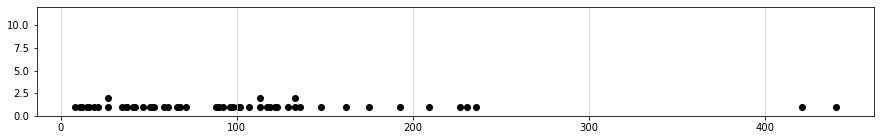

In [44]:
dotplot(df.iloc[:, 1])

In [45]:
# Sec 2.3 Problem 5
path = '/home/mark/Documents/Class/Understanding Basic Statistics/Data/Chapter 2'
fn = 'Prob0203_05.xls'
df = pd.read_excel(os.path.join(path, fn))

# df = df.set_index('Age')

display(df.head())
print(f'size: {df.size}')

cols = df.columns.values.tolist()

for i in range(2):
    print(f'\n\nPeriod: {cols[i]}\n')
    stem_leave(df.iloc[:, i], split=True)


,1961-81,1981-2000
0,23,9
1,23,8
2,18,9
3,19,10
4,16,14


size: 40


Period: 1961-81

Stem | Leaves
   0 | 
   0 | 9 9
   1 | 0 0 2 3 3 4
   1 | 5 5 6 6 7 8 8 9
   2 | 0 2 3 3
   2 | 


Period: 1981-2000

Stem | Leaves
   0 | 
   0 | 7 7 7 8 8 8 8 9 9 9 9 9 9 9 9
   1 | 0 0 1 1 4
   1 | 


In [46]:
# Sec 2.3 Problem 6
path = '/home/mark/Documents/Class/Understanding Basic Statistics/Data/Chapter 2'
fn = 'Prob0203_06.xls'
df = pd.read_excel(os.path.join(path, fn))

# df = df.set_index('Age')

display(df.head())
print(f'size: {df.size}')

cols = df.columns.values.tolist()

for i in range(2):
    print(f'\n\nPeriod: {cols[i]}\n')
    stem_leave(df.iloc[:, i], split=True)


,1st_round,4th_round
0,71,69
1,65,69
2,67,73
3,73,74
4,74,72


size: 64


Period: 1st_round

Stem | Leaves
   6 | 
   6 | 5 6 7 7
   7 | 0 1 1 1 1 1 1 1 1 1 1 2 2 2 3 3 3 3 4 4 4
   7 | 5 5 5 5 5 5 5


Period: 4th_round

Stem | Leaves
   6 | 
   6 | 8 9 9 9 9 9
   7 | 0 0 0 0 1 1 1 1 1 1 1 1 2 2 2 2 2 2 3 3 3 3 3 4 4 4
   7 | 


In [47]:
# Sec 2.3 Problem 7
path = '/home/mark/Documents/Class/Understanding Basic Statistics/Data/Chapter 2'
fn = 'Table0216.xls'
df = pd.read_excel(os.path.join(path, fn))

print(f'shape: {df.shape}')
display(df.head())

stem_leave((df['Tar']*10).astype('int'))

shape: (25, 4)


,Brand,Tar,Nicotine,CO
0,Alpine,14.1,0.86,13.6
1,Benson_Hedges,16.0,1.06,16.6
2,Bull_Durham,29.8,2.03,23.5
3,Camel_Lights,8.0,0.67,10.2
4,Carlton,4.1,0.40,5.4


Stem | Leaves
   1 | 0
   2 | 
   3 | 
   4 | 1 5
   5 | 
   6 | 
   7 | 3 8
   8 | 0 6 8
   9 | 0
  10 | 
  11 | 4
  12 | 0 4 8
  13 | 7
  14 | 1 5 9
  15 | 0 1 2 8
  16 | 0 6
  17 | 0
  18 | 
  19 | 
  20 | 
  21 | 
  22 | 
  23 | 
  24 | 
  25 | 
  26 | 
  27 | 
  28 | 
  29 | 8


In [48]:
# Sec 2.3 Problem 8
path = '/home/mark/Documents/Class/Understanding Basic Statistics/Data/Chapter 2'
fn = 'Table0216.xls'
df = pd.read_excel(os.path.join(path, fn))

print(f'shape: {df.shape}')
display(df.head())

stem_leave((df['CO']*10).astype('int'))

shape: (25, 4)


,Brand,Tar,Nicotine,CO
0,Alpine,14.1,0.86,13.6
1,Benson_Hedges,16.0,1.06,16.6
2,Bull_Durham,29.8,2.03,23.5
3,Camel_Lights,8.0,0.67,10.2
4,Carlton,4.1,0.40,5.4


Stem | Leaves
   1 | 5
   2 | 
   3 | 
   4 | 9
   5 | 4
   6 | 
   7 | 
   8 | 5
   9 | 0 5
  10 | 0 2 2 6
  11 | 
  12 | 3 6
  13 | 0 6 9
  14 | 4 9
  15 | 0 4 9
  16 | 3 6
  17 | 5
  18 | 5
  19 | 
  20 | 
  21 | 
  22 | 
  23 | 5


shape: (25, 4)


,Brand,Tar,Nicotine,CO
0,Alpine,14.1,0.86,13.6
1,Benson_Hedges,16.0,1.06,16.6
2,Bull_Durham,29.8,2.03,23.5
3,Camel_Lights,8.0,0.67,10.2
4,Carlton,4.1,0.40,5.4


Stem | Leaves
   1 | 3
   2 | 
   3 | 
   4 | 0 2
   5 | 6
   6 | 1 7 9
   7 | 4 6 8
   8 | 2 6
   9 | 0 5 6
  10 | 1 1 2 2 4 6 8
  11 | 2
  12 | 6
  13 | 
  14 | 
  15 | 
  16 | 
  17 | 
  18 | 
  19 | 
  20 | 2


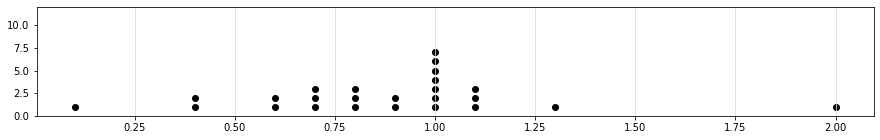

In [49]:
# Sec 2.3 Problem 9
path = '/home/mark/Documents/Class/Understanding Basic Statistics/Data/Chapter 2'
fn = 'Table0216.xls'
df = pd.read_excel(os.path.join(path, fn))

print(f'shape: {df.shape}')
display(df.head())

stem_leave((df['Nicotine']*100).astype('int'))

dotplot(df['Nicotine'].round(1))

## Chapter 2 Review

In [50]:
# Chpt 2 Rev Problem 12C
rate = 444/100_000
pop_1997 = 266_574_000
pop_2020 = 323_724_000

print(f'prisoners, 1997: {round(rate*pop_1997):,}')
print(f'prisoners, 2020: {round(rate*pop_2020):,}')


prisoners, 1997: 1,183,589
prisoners, 2020: 1,437,335


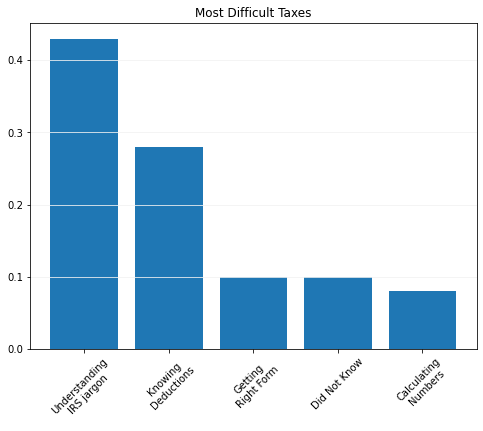

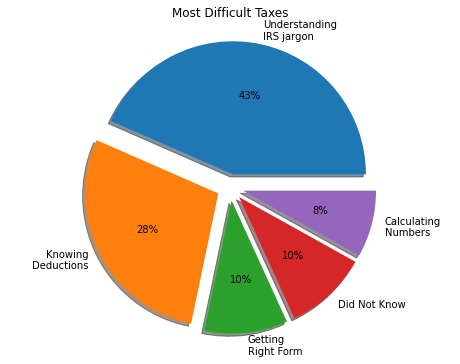

In [51]:
# Chpt 2 Rev Problem 13
t = [
    ('Understanding\nIRS jargon', .43),
    ('Knowing\nDeductions', .28),
    ('Getting\nRight Form', .10),
    ('Calculating\nNumbers', .08),
    ('Did Not Know', .10),
]

df = pd.DataFrame(t, columns=['Reason', 'Percent'])

title = 'Most Difficult Taxes'

pareto_plot(df, 'Percent', 'Reason', title)

pie_plot(df, 'Percent', 'Reason', title)

shape: (50, 1)


,age_(years)
0,46
1,16
2,41
3,26
4,22


Stem | Leaves
   1 | 6 8
   2 | 0 1 1 2 2 2 3 4 4 5 6 6 6 7 7 7 9
   3 | 0 0 1 1 2 3 4 4 5 5 6 7 8 9
   4 | 0 0 1 3 5 6 7 7 9 9
   5 | 1 3 5 6 8
   6 | 3 4
min: 16  max: 64  size: 50
class width: 7
freq: [ 8 11 11  7  6  4  3]
cls_limits: [(16, 22), (23, 29), (30, 36), (37, 43), (44, 50), (51, 57), (58, 64)]
boundaries: [15.5 22.5 29.5 36.5 43.5 50.5 57.5 64.5]
midpts: [19.0, 26.0, 33.0, 40.0, 47.0, 54.0, 61.0]
rel_freq: [0.16 0.22 0.22 0.14 0.12 0.08 0.06]


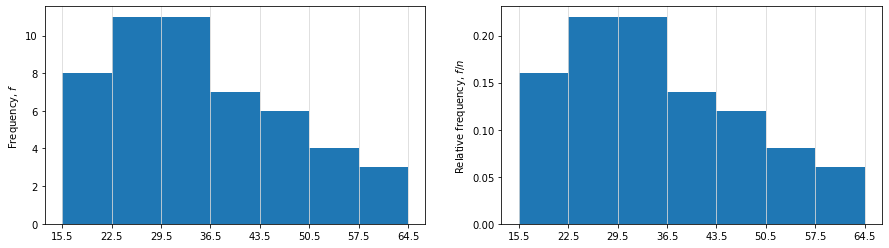

class width: 7
freq: [ 8 11 11  7  6  4  3]
cumulative: [ 0  8 19 30 37 43 47 50]
boundaries: [15.5 22.5 29.5 36.5 43.5 50.5 57.5 64.5]


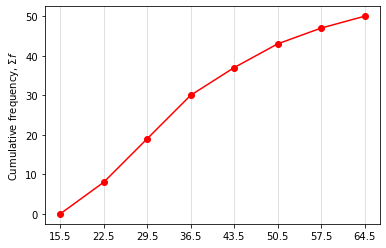

In [52]:
# Chpt 2 Rev Problem 14
df = pd.read_excel(os.path.join(CHPT_2, 'RProb0208.xls'))

print(f'shape: {df.shape}')
display(df.head())

stem_leave(df['age_(years)'])

freq_dist(df['age_(years)'], 7)

ogive(df['age_(years)'], 7)

shape: (60, 1)


,circum_(mm)
0,108
1,99
2,106
3,102
4,115


Stem | Leaves
   6 | 9
   7 | 5
   8 | 3 4
   9 | 0 1 1 6 9 9 9
  10 | 0 1 2 2 3 5 5 5 6 6 6 8 8 8 8 9 9
  11 | 0 1 2 2 3 3 4 4 4 5 5 6 7 7 7 7 7 9
  12 | 0 0 0 2 2 2 2 3 4 5 9
  13 | 8
  14 | 2 2
min: 69  max: 142  size: 60
class width: 11
freq: [ 2  3  8 19 22  3  3]
cls_limits: [(69, 79), (80, 90), (91, 101), (102, 112), (113, 123), (124, 134), (135, 145)]
boundaries: [ 68.5  79.5  90.5 101.5 112.5 123.5 134.5 145.5]
midpts: [74.0, 85.0, 96.0, 107.0, 118.0, 129.0, 140.0]
rel_freq: [0.03333333 0.05       0.13333333 0.31666667 0.36666667 0.05
 0.05      ]


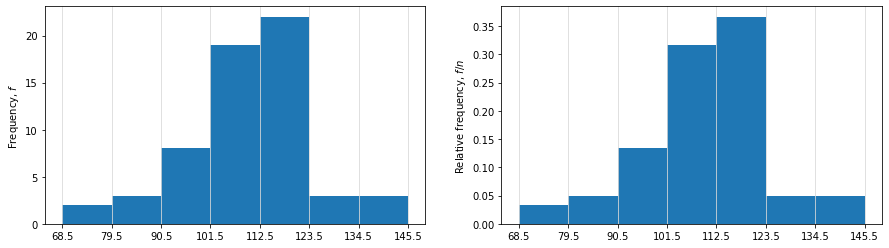

class width: 11
freq: [ 2  3  8 19 22  3  3]
cumulative: [ 0  2  5 13 32 54 57 60]
boundaries: [ 68.5  79.5  90.5 101.5 112.5 123.5 134.5 145.5]


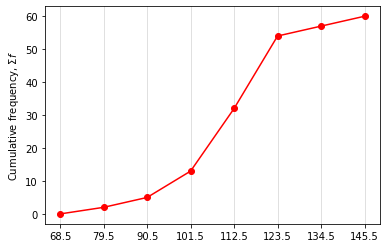

In [53]:
# Chpt 2 Rev Problem 15
df = pd.read_excel(os.path.join(CHPT_2, 'RProb0209.xls'))

print(f'shape: {df.shape}')
display(df.head())

stem_leave(df['circum_(mm)'])

freq_dist(df['circum_(mm)'], 7)

ogive(df['circum_(mm)'], 7)

shape: (5, 2)


,Case,Filings_(k)
1,Torts,191
0,Contracts,107
2,Abs_Liability,49
3,Other_Liability,38
4,Other,21


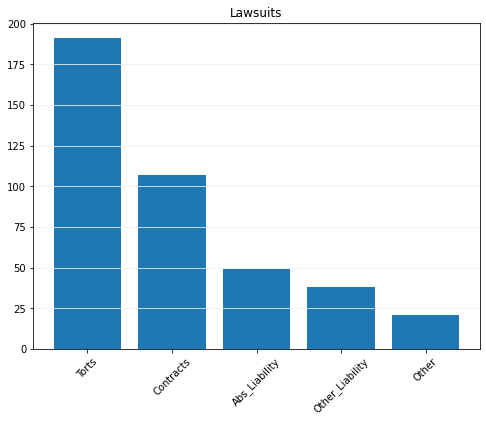

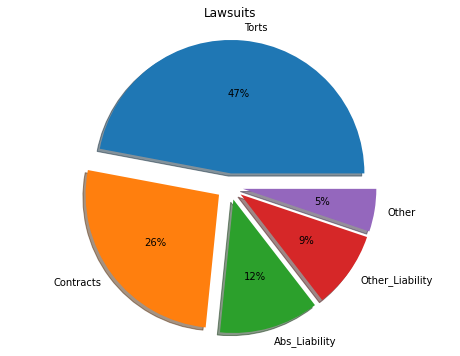

In [54]:
# Chpt 2 Rev Problem 16
df = pd.read_excel(os.path.join(CHPT_2, 'RProb0210.xls'))

print(f'shape: {df.shape}')
df = df.sort_values(by=['Filings_(k)'], ascending=False)
display(df.head())

title = 'Lawsuits'

pareto_plot(df, 'Filings_(k)', 'Case', title)

pie_plot(df, 'Filings_(k)', 'Case', title)